In [ ]:
# Import necessary library
import pandas as pd

# Reload the data from the CSV file
data = pd.read_csv("Bloom_cleaned_data_final_cleaned.csv")

Saving Bloom_cleaned_data_final_cleaned.csv to Bloom_cleaned_data_final_cleaned.csv


In [ ]:
# Normalizing the specified columns
columns_to_normalize = [
    'ENVIRON_DISCLOSURE_SCORE',
    'SOCIAL_DISCLOSURE_SCORE',
    'GOVNCE_DISCLOSURE_SCORE',
    'ESG_DISCLOSURE_SCORE'
]

# Applying min-max normalization
for col in columns_to_normalize:
    min_val = data[col].min()
    max_val = data[col].max()
    data[col] = (data[col] - min_val) / (max_val - min_val)

# Displaying the first few rows of the normalized data for verification
data.head()


Sedol                              Name  EBITDA_VOLATILITY  \
0  B1YW440                      3i Group plc           0.439217   
1  2595708                        3M Company           0.017232   
2  BY9D3L9                       3SBio, Inc.           0.132001   
3  4253059  A.P. Moller - Maersk A/S Class A           0.590330   
4  4253048  A.P. Moller - Maersk A/S Class B           0.590330   

   ENVIRON_DISCLOSURE_SCORE  SOCIAL_DISCLOSURE_SCORE  GOVNCE_DISCLOSURE_SCORE  \
0                  0.260996                 0.480361                 0.792208   
1                  0.643766                 0.556010                 0.753246   
2                  0.325700                 0.556010                 0.532467   
3                  0.384224                 0.491855                 0.461039   
4                  0.384224                 0.491855                 0.461039   

   ESG_DISCLOSURE_SCORE  
0              0.457966  
1              0.688212  
2              0.437810  
3              0.437809  
4              0.437809

In [ ]:
# Save the combined data to a new CSV file
Norm_data = 'volatility_bloom_norm.csv'
data.to_csv(Norm_data, index=False)

In [ ]:
from google.colab import files
files.download('volatility_bloom_norm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Import necessary library
import pandas as pd

# Reload the data from the CSV file
data = pd.read_csv("volatility_bloom_norm.csv")

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd

# Prepare your data
features = ['ENVIRON_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'ESG_DISCLOSURE_SCORE']
target = 'EBITDA_VOLATILITY'
X = data[features]  # Features
y = data[target]  # Target variable

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X, y)

# Output the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

In [4]:
# Given best parameters from grid search
best_params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

# Creating the SVR model with the best parameters
model_best = SVR(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Training the model with the entire dataset
model_best.fit(X, y)

print("Model trained successfully with the best parameters.")


Model trained successfully with the best parameters.


In [5]:
from joblib import dump

dump(model_best, 'svm_model.joblib')


['svm_model.joblib']

In [ ]:
import pandas as pd
from scipy.stats import boxcox
from numpy import nan

from google.colab import files
uploaded = files.upload()

# Reload the data from the CSV file
data = pd.read_csv("Rearranged_Final_SME_ESG_Fame.csv")

# Adding a small constant to shift all EBITDA values to positive
data['EBITDA'] += abs(data['EBITDA'].min()) + 1
data['EBITDA'], _ = boxcox(data['EBITDA'])

# Calculate year-over-year percentage change in EBITDA for each company
data['EBITDA_CHANGE'] = data.groupby('Company name')['EBITDA'].pct_change()

# Calculate the volatility of EBITDA for each company
ebitda_volatility = data.groupby('Company name')['EBITDA_CHANGE'].std().reset_index()
ebitda_volatility.rename(columns={'EBITDA_CHANGE': 'EBITDA_VOLATILITY'}, inplace=True)

# Merge the EBITDA volatility back into the main dataset
data = data.merge(ebitda_volatility, on='Company name', how='left')

# Keep only the rows with ESG data and the new EBITDA_VOLATILITY column
esg_columns = ['ENVIRON_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'ESG_DISCLOSURE_SCORE']
data_final = data[['Company name', 'EBITDA_VOLATILITY'] + esg_columns].dropna(subset=esg_columns)

# Ensure no blank cells in EBITDA_VOLATILITY column
data_final['EBITDA_VOLATILITY'].fillna(0, inplace=True)


Saving Rearranged_Final_SME_ESG_Fame.csv to Rearranged_Final_SME_ESG_Fame.csv


In [ ]:
data_final.head()

Company name  EBITDA_VOLATILITY  \
10                   ABEL & COLE LIMITED           0.011632   
21          ADAM SMITH INTERNATIONAL LTD           0.012696   
33             ALL MARKET EUROPE LIMITED           0.005285   
47  BATES WELLS & BRAITHWAITE LONDON LLP           0.001938   
59           BENNETTS ASSOCIATES LIMITED           0.000770   

    ENVIRON_DISCLOSURE_SCORE  SOCIAL_DISCLOSURE_SCORE  \
10                      36.1                     52.8   
21                       3.4                    125.4   
33                      16.3                     50.6   
47                      15.5                     78.9   
59                      34.4                     77.0   

    GOVNCE_DISCLOSURE_SCORE  ESG_DISCLOSURE_SCORE  
10                     14.6                 103.5  
21                     14.1                 142.9  
33                     14.7                  81.6  
47                     22.1                 116.5  
59                     10.1                 121.5

In [ ]:
# Save the combined data to a new CSV file
Norm_data = 'volatility_SME_bloom_norm.csv'
data_final.to_csv(Norm_data, index=False)

In [ ]:
from google.colab import files
files.download('volatility_SME_bloom_norm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Reload the data from the CSV file
data = pd.read_csv("volatility_SME_bloom_norm.csv")

In [7]:
from joblib import load
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the saved SVM model
model = load('svm_model.joblib')  # Replace with the path to your saved model

# Load the new test data
test_data = pd.read_csv('volatility_SME_bloom_norm.csv')

# Prepare the test data
features = ['ENVIRON_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'ESG_DISCLOSURE_SCORE']
target = 'EBITDA_VOLATILITY'  # Replace with your actual target column name
test_X = test_data[features].values
test_y = test_data[target].values

# Make predictions with the SVM model
test_predictions = model.predict(test_X)

# Evaluate the model on the new dataset
test_mse = mean_squared_error(test_y, test_predictions)
mae = mean_absolute_error(test_y, test_predictions)

print(f"New Data - Mean Squared Error: {test_mse}")
print(f"New Data - Mean Absolute Error: {mae}")


New Data - Mean Squared Error: 0.027133368378709118
New Data - Mean Absolute Error: 0.1625066160608054


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


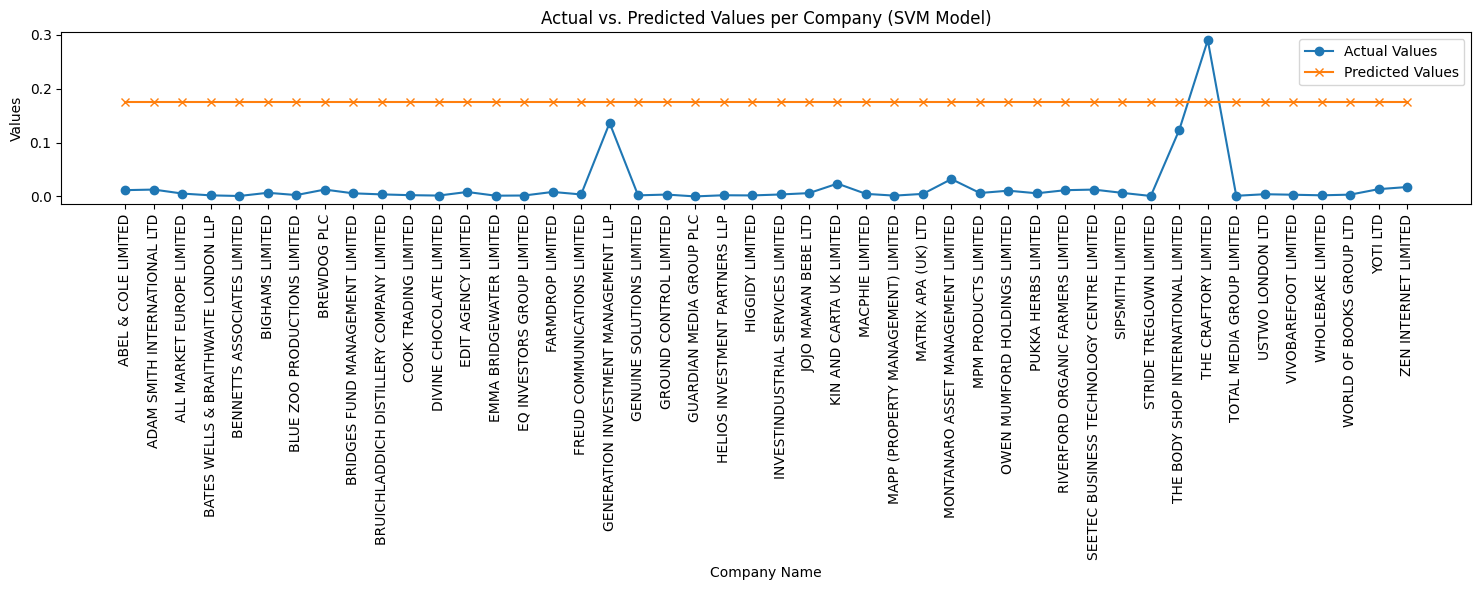

In [8]:
import matplotlib.pyplot as plt

company_names = test_data['Company name']

plt.figure(figsize=(15, 6))
plt.plot(company_names, test_y, label='Actual Values', marker='o')
plt.plot(company_names, test_predictions, label='Predicted Values', marker='x')
plt.xticks(rotation=90)
plt.title('Actual vs. Predicted Values per Company (SVM Model)')
plt.xlabel('Company Name')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()
